# Download dataset

In [1]:
import numpy as np
import pandas as pd
import random

C:\Users\User\AppData\Local\Temp\ipykernel_13668\1175803517.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
!pip install -q kaggle

In [21]:
# download api token from: https://www.kaggle.com/settings -> and upload here:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"danielhugauf","key":"0295a67482876b6105c9689eaf93ab20"}'}

In [22]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [23]:
!cp kaggle.json ~/.kaggle/

In [24]:
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
# !kaggle competitions download -c optiver-trading-at-the-close

In [26]:
!kaggle datasets download -d nguyentuannguyen/optiver-trading-at-the-close

optiver-trading-at-the-close.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!unzip optiver-trading-at-the-close.zip

Archive:  optiver-trading-at-the-close.zip
  inflating: optiver-trading-at-the-close/.idea/.gitignore  
  inflating: optiver-trading-at-the-close/.idea/inspectionProfiles/profiles_settings.xml  
  inflating: optiver-trading-at-the-close/.idea/jupyter-settings.xml  
  inflating: optiver-trading-at-the-close/.idea/misc.xml  
  inflating: optiver-trading-at-the-close/.idea/modules.xml  
  inflating: optiver-trading-at-the-close/.idea/optiver-trading-at-the-close.iml  
  inflating: optiver-trading-at-the-close/.idea/workspace.xml  
  inflating: optiver-trading-at-the-close/example_test_files/revealed_targets.csv  
  inflating: optiver-trading-at-the-close/example_test_files/sample_submission.csv  
  inflating: optiver-trading-at-the-close/example_test_files/test.csv  
  inflating: optiver-trading-at-the-close/optiver2023/__init__.py  
  inflating: optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: optiver-trading-at-the-close/optiver_stock_t

In [28]:
train_dataset = pd.read_csv('/content/optiver-trading-at-the-close/train.csv')
train_dataset.shape

(5237980, 17)

## local 

In [3]:
train_dataset = pd.read_csv('data/optiver-trading-at-the-close/train.csv')
train_dataset.shape

(5237980, 17)

In [4]:
train_dataset.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


# Explore the dataset

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


### Missing data

In [9]:
train_dataset.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

## Inspect columns

In [20]:
def inspect_columns(df):
    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
#         'null_num': df.isnull().sum(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),
#         '1st_row': df.iloc[0],
#         'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result

inspect_columns(train_dataset)
# seconds_in_bucket is from 0s to 540s inclusive, therefore 55 snapshots
# target - The 60 second future move in the wap of the stock, less the 60 second future move of the synthetic index.
# far and near price will be public only 5 minutes before the close

,unique,cardinality,with_null,null_pct,dtype
stock_id,False,200,False,0.00,int64
date_id,False,481,False,0.00,int64
seconds_in_bucket,False,55,False,0.00,int64
imbalance_size,False,2971863,True,0.00,float64
imbalance_buy_sell_flag,False,3,False,0.00,int64
reference_price,False,28741,True,0.00,float64
matched_size,False,2948862,True,0.00,float64
far_price,False,95739,True,55.26,float64
near_price,False,84625,True,54.55,float64
bid_price,False,28313,True,0.00,float64


# Exploratory Analysis

Positive and negative target

In [5]:
df = train_dataset.copy()

In [55]:
# visualize the 220 missing values of wap

null_wap = df[df['wap'].isna()]
null_wap = null_wap['stock_id'].value_counts().sort_index()
null_wap

# the stocks of the missing values: 19,101,131,158

# visualize the 220 missing values of imbalance size
null_imb = df[df['imbalance_size'].isna()]
#null_imb = null_imb['stock_id'].value_counts().sort_index()
null_imb[null_imb["stock_id"]==158]

# these stocks are the same as the missing wap, date: 438
# the stocks and dates of the missing values: 19-at the date 438, 101-at the date 328, 131-at the date 35, 158-at the date 388
# the missing values are in the same rows -> we can drop them
# every day has 11000 rows, and 200 stocks, so 55 rows for each stock


def drop_missing_values(df):
    df = df.wap.dropna()
    return df

# drop the missing values of wap
dropped = drop_missing_values(df)
dropped.shape



(5237760,)

C:\Users\User\AppData\Local\Temp\ipykernel_22288\3083408421.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['target_sign'][df['target'] >= 0] = 'Positive'
C:\Users\User\AppData\Local\Temp\ipykernel_22288\3083408421.py:4: SettingWithCo

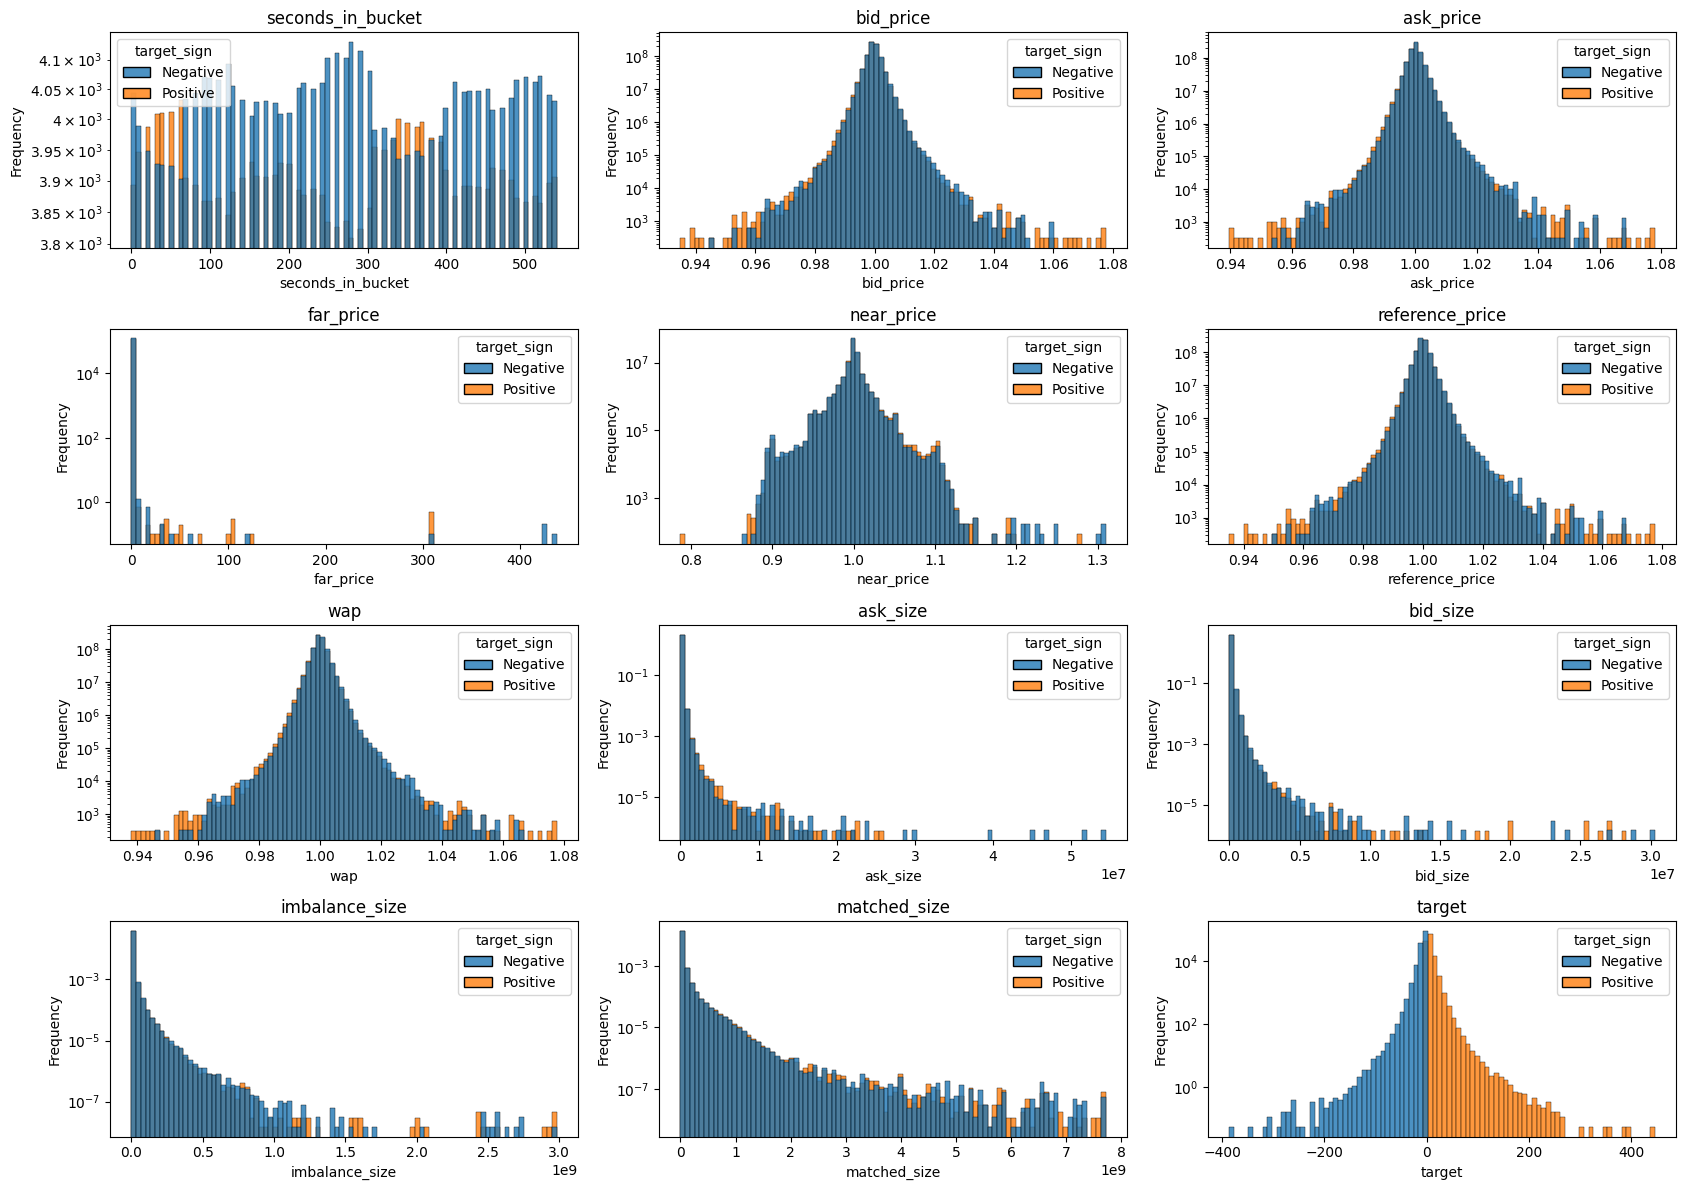

In [21]:


df['target_sign'] = 'Negative'
df['target_sign'][df['target'] >= 0] = 'Positive'

cols = ['seconds_in_bucket', 'bid_price', 'ask_price', 'far_price', 'near_price','reference_price', 'wap',
        'ask_size','bid_size','imbalance_size', 'matched_size', 'target']
fig, axes = plt.subplots(4, 3, figsize = (17, 12))
for i, col in enumerate(cols):
    ax = axes[i // 3, i % 3 ]
    hist_kwargs = dict(ax=ax, alpha=0.8, bins=90, stat='frequency',)
    sns.histplot(data = df, x = col, hue = 'target_sign', **hist_kwargs)
    ax.set_title(f"{col}")
    ax.set(yscale='log')
plt.tight_layout()
plt.show()

### Plot data for a single day along the seconds

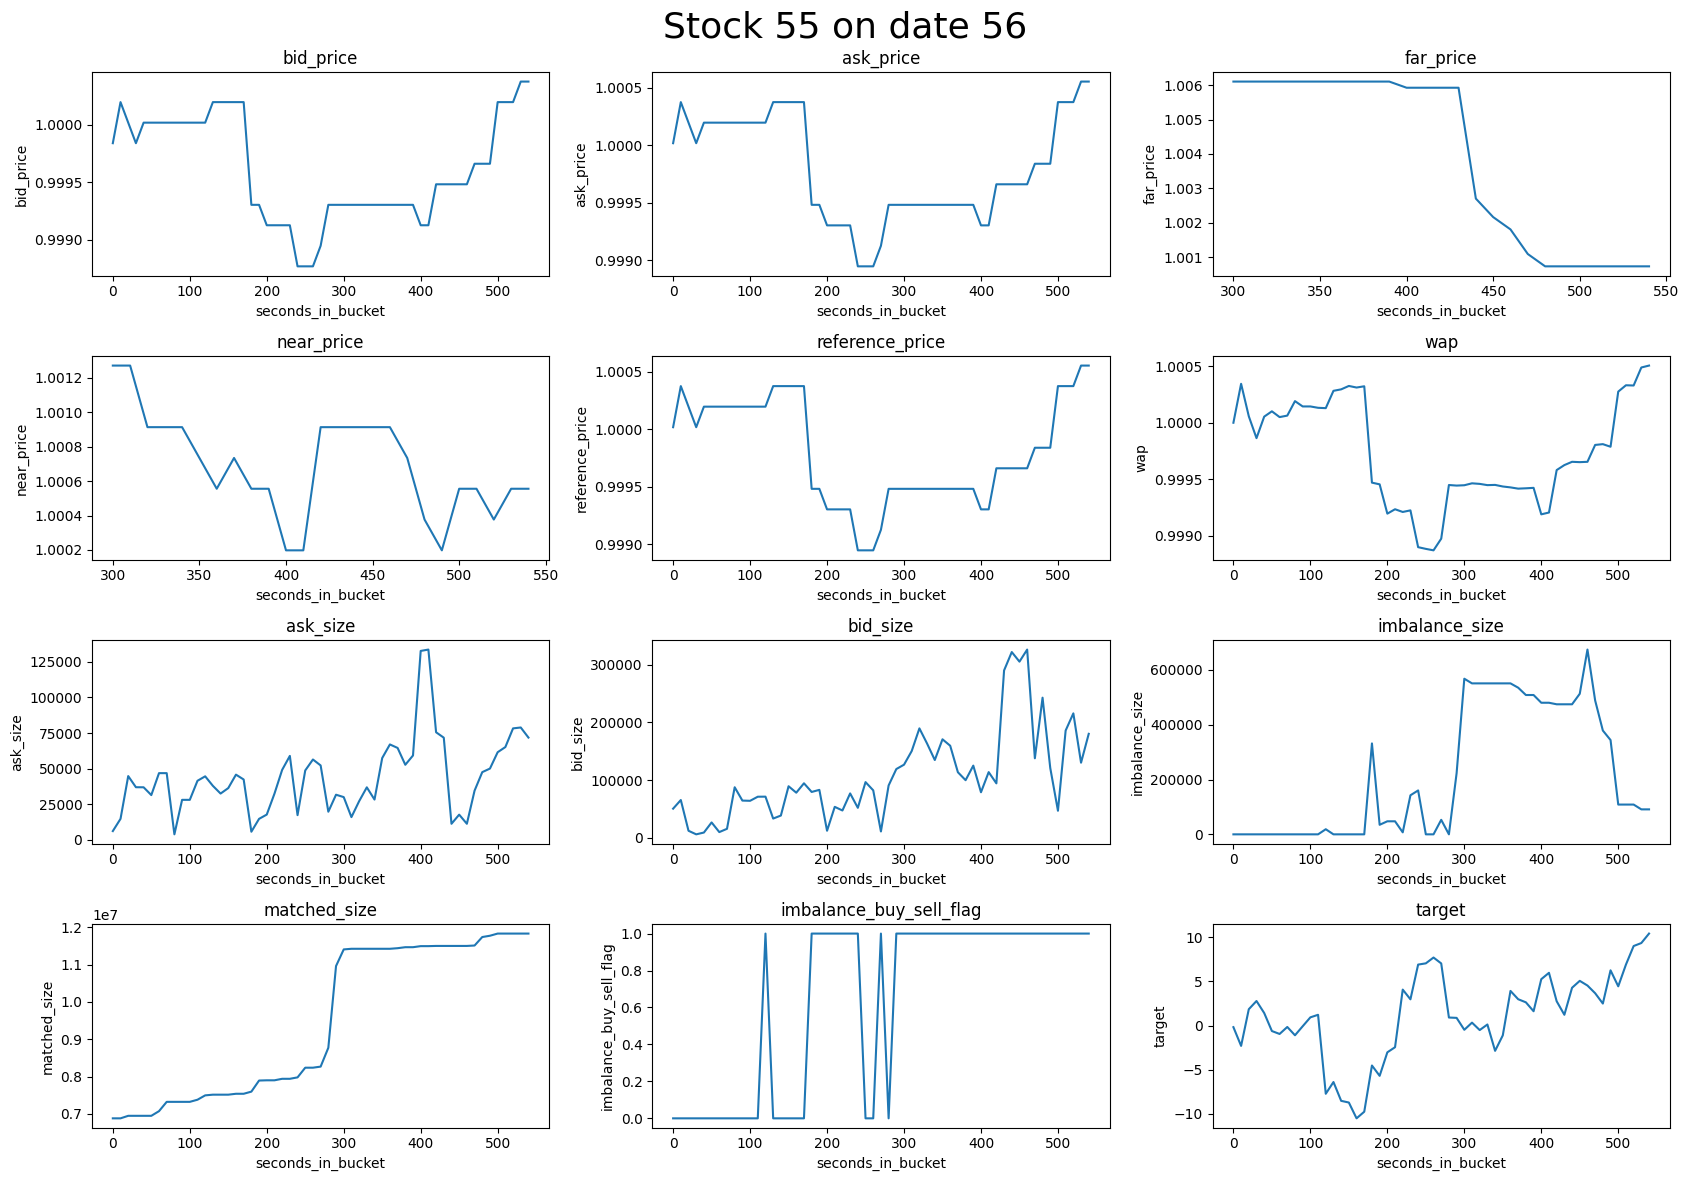

In [52]:
cols = ['bid_price', 'ask_price', 'far_price', 'near_price','reference_price', 'wap',
        'ask_size','bid_size','imbalance_size', 'matched_size', 'imbalance_buy_sell_flag', 'target']
fig, axes = plt.subplots(4, 3, figsize = (17, 12))
_ = df.query("stock_id == 55 & date_id == 56")
for i, col in enumerate(cols):
    ax = axes[i // 3, i % 3 ]
    sns.lineplot(data = _, x = 'seconds_in_bucket', y = col, ax = ax)
    ax.set_title(f"{col}")
# set title for the whole plot
plt.suptitle('Stock 55 on date 56', fontsize=26)

plt.tight_layout()

plt.show()

Date and time ID

In [18]:
# date id between 0 and 480
train_dataset["date_id"].unique()

# date id between 0 and 26454
train_dataset["time_id"].unique()

array([    0,     1,     2, ..., 26452, 26453, 26454], dtype=int64)

Examine these columns
- far price
- near price

In [32]:
train_dataset[['far_price', 'near_price']].describe()

,far_price,near_price
count,2.343638e+06,2.380800e+06
mean,1.001713e+00,9.996601e-01
std,7.214705e-01,1.216920e-02
min,7.700000e-05,7.869880e-01
25%,9.963320e-01,9.971000e-01
50%,9.998830e-01,9.998890e-01
75%,1.003318e+00,1.002590e+00
max,4.379531e+02,1.309732e+00


<Axes: xlabel='near_price', ylabel='Density'>

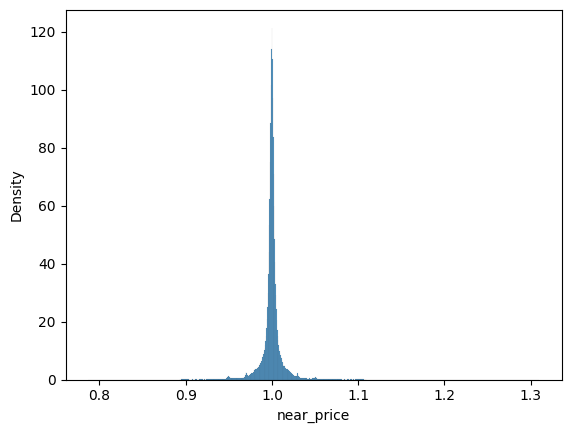

In [33]:
sns.histplot(x=train_dataset.near_price, stat='density', bins=1000)

<Axes: xlabel='far_price', ylabel='Density'>

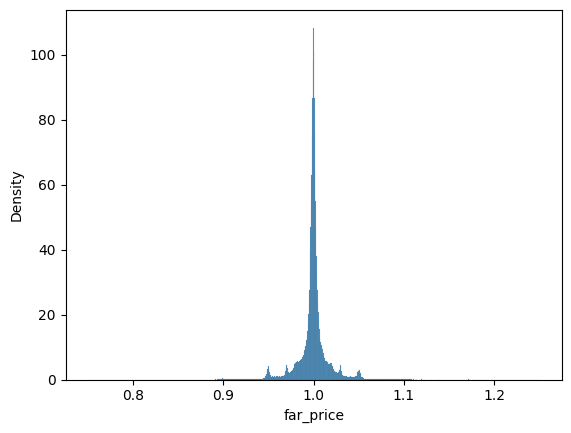

In [34]:
sns.histplot(x=train_dataset[(train_dataset.far_price > 0.75) & (train_dataset.far_price < 1.25)].far_price, stat='density', bins=1000)

<Axes: xlabel='imbalance_buy_sell_flag', ylabel='Density'>

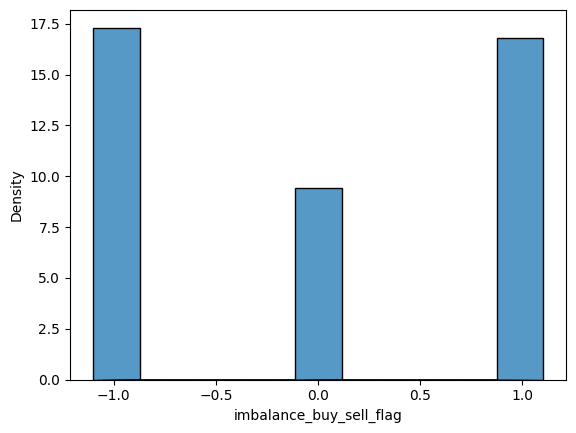

In [35]:
sns.histplot(x=train_dataset.imbalance_buy_sell_flag, shrink=10, stat='density')

Weighted Average Price
- higher than 1, it indicates that there was strong buying interest during the day.
- lower than 1, it suggests selling pressure.

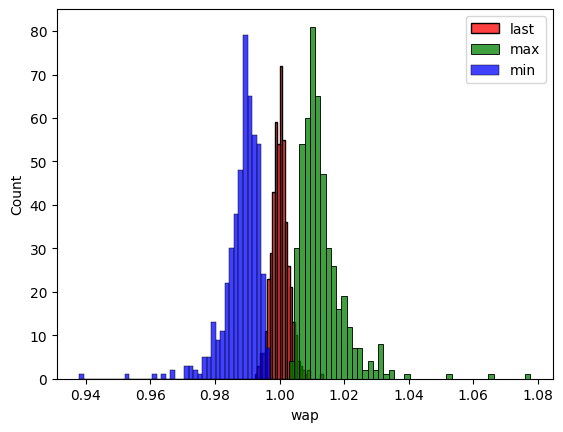

In [8]:
# sns.histplot(x=train_dataset.groupby('date_id').first().near_price)
sns.histplot(x=train_dataset.groupby('date_id').last().wap, label='last', color='red')
sns.histplot(x=train_dataset.groupby('date_id').wap.max(), label='max',color='green')
sns.histplot(x=train_dataset.groupby('date_id').wap.min(), label='min',color='blue')
plt.legend()

Volume

Below average volume: 232 days
Average volume: 105389.27614756071
All days: 481


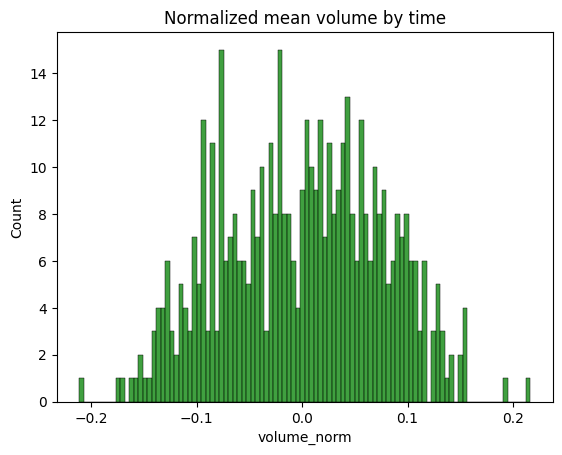

In [27]:
# normalize the volume
train_dataset['volume'] = train_dataset['ask_size'] + train_dataset['bid_size']
train_dataset['volume_norm'] = (train_dataset['volume'] - train_dataset['volume'].mean()) / train_dataset['volume'].std()

# visualize the volume by time
plt.title('Normalized mean volume by time')
sns.histplot(x=train_dataset.groupby('date_id').volume_norm.mean(), label='mean', color='green', bins=100)
#sns.histplot(x=train_dataset.groupby('date_id').volume.std(), label='std', color='red', bins=100)

# leegend how much days have below average volume
below_avg = train_dataset.groupby('date_id').volume.mean() < train_dataset.volume.mean()
print(f'Below average volume: {below_avg.sum()} days')

print(f'Average volume: {train_dataset.volume.mean()}')
print(f'All days: {train_dataset.date_id.nunique()}')






In [18]:
train_dataset[['target']].describe()

,target
count,5.237892e+06
mean,-4.756125e-02
std,9.452860e+00
min,-3.852898e+02
25%,-4.559755e+00
50%,-6.020069e-02
75%,4.409552e+00
max,4.460704e+02


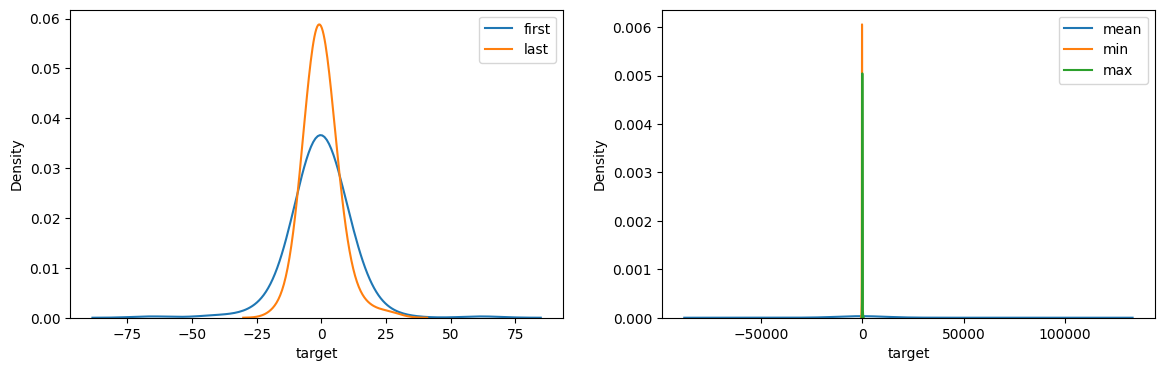

In [31]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
# sns.kdeplot(x=train_dataset.groupby('date_id').target.first(), bw_adjust=2, label='first')
# sns.kdeplot(x=train_dataset.groupby('date_id').target.last(), bw_adjust=2, label='last')
# plt.legend()
# plt.subplot(122)
# sns.kdeplot(x=train_dataset.groupby('date_id').target.min(), bw_adjust=3, label='min')
# sns.kdeplot(x=train_dataset.groupby('date_id').target.max(), bw_adjust=3, label='max')
# plt.legend()

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x=train_dataset.groupby('stock_id').target.first(), bw_adjust=2, label='first')
sns.kdeplot(x=train_dataset.groupby('stock_id').target.last(), bw_adjust=2, label='last')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=train_dataset.groupby('stock_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=train_dataset.groupby('stock_id').target.max(), bw_adjust=3, label='max')
plt.legend()

<Axes: xlabel='target', ylabel='Density'>

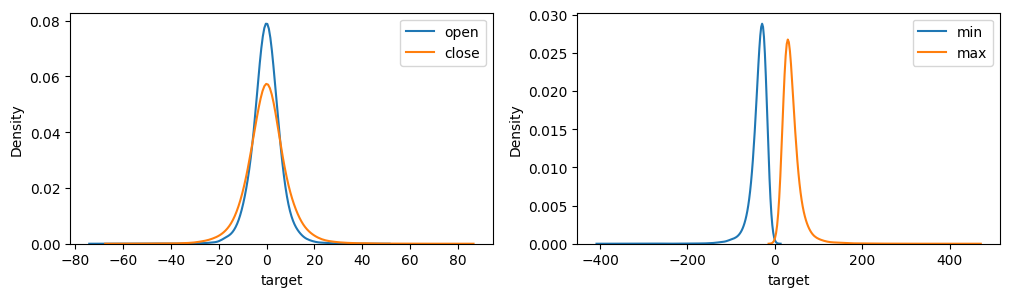

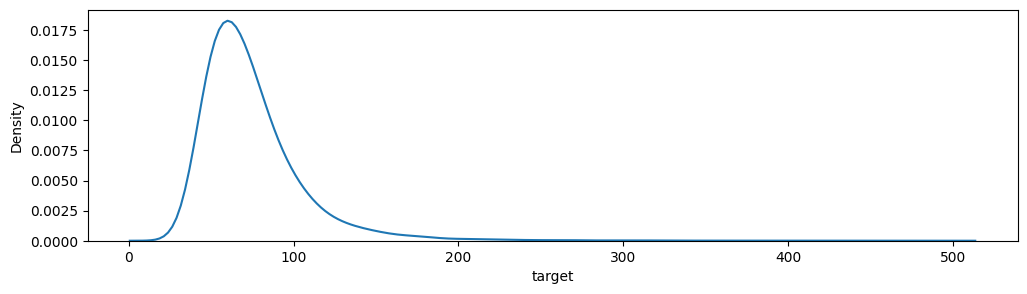

In [40]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.kdeplot(x=train_dataset.groupby('time_id').target.first(), bw_adjust=2, label='open')
sns.kdeplot(x=train_dataset.groupby('time_id').target.last(), bw_adjust=2, label='close')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=train_dataset.groupby('time_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=train_dataset.groupby('time_id').target.max(), bw_adjust=3, label='max')
plt.legend()
plt.figure(figsize=(12,3))
sns.kdeplot(x=train_dataset.groupby('time_id').target.max() - train_dataset.groupby('time_id').target.min(), bw_adjust=2, label='max - min')

# this is the density of the target variable

Different stocks at the same day

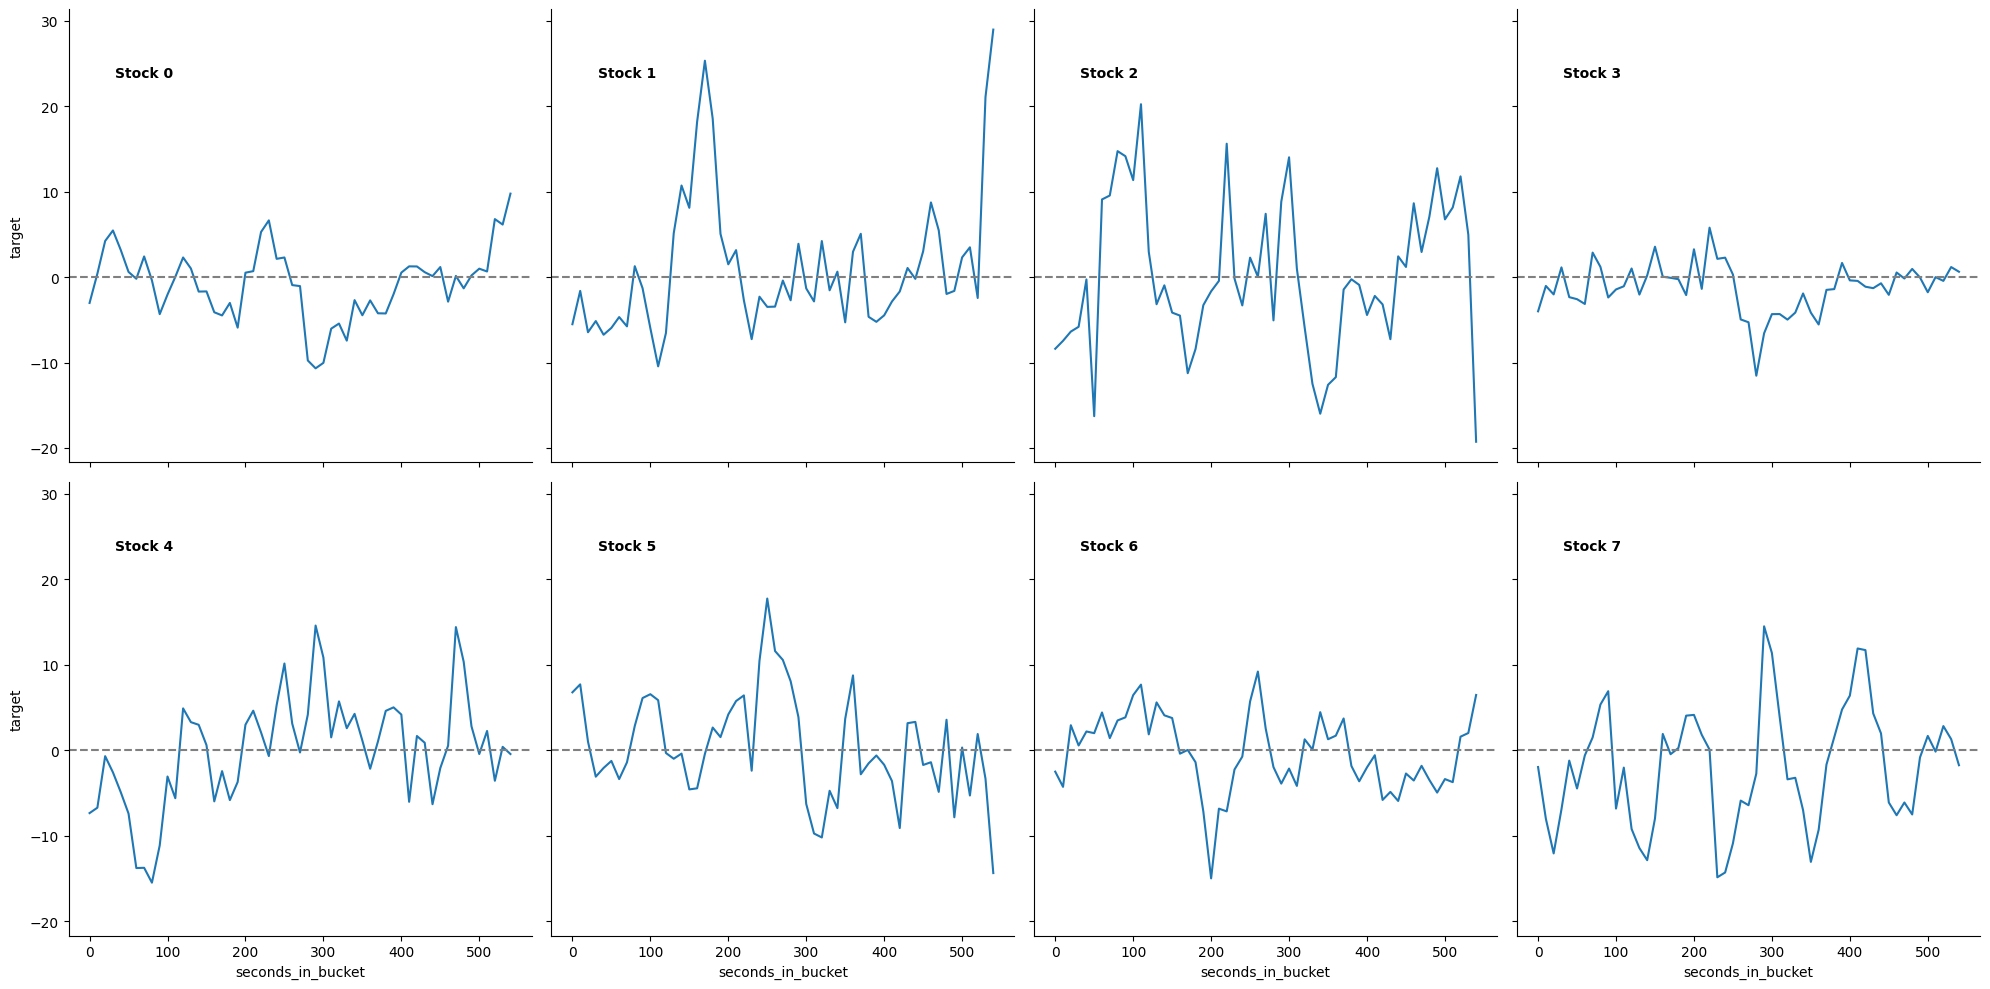

In [41]:
g = sns.relplot(
    data=train_dataset.query("date_id == 0 & stock_id < 8"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="stock_id",
    col_wrap=4
)
for stock_id, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.1, .85, f"Stock {stock_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.refline(y=0)
g.tight_layout()
plt.show()

Single stock changes by day

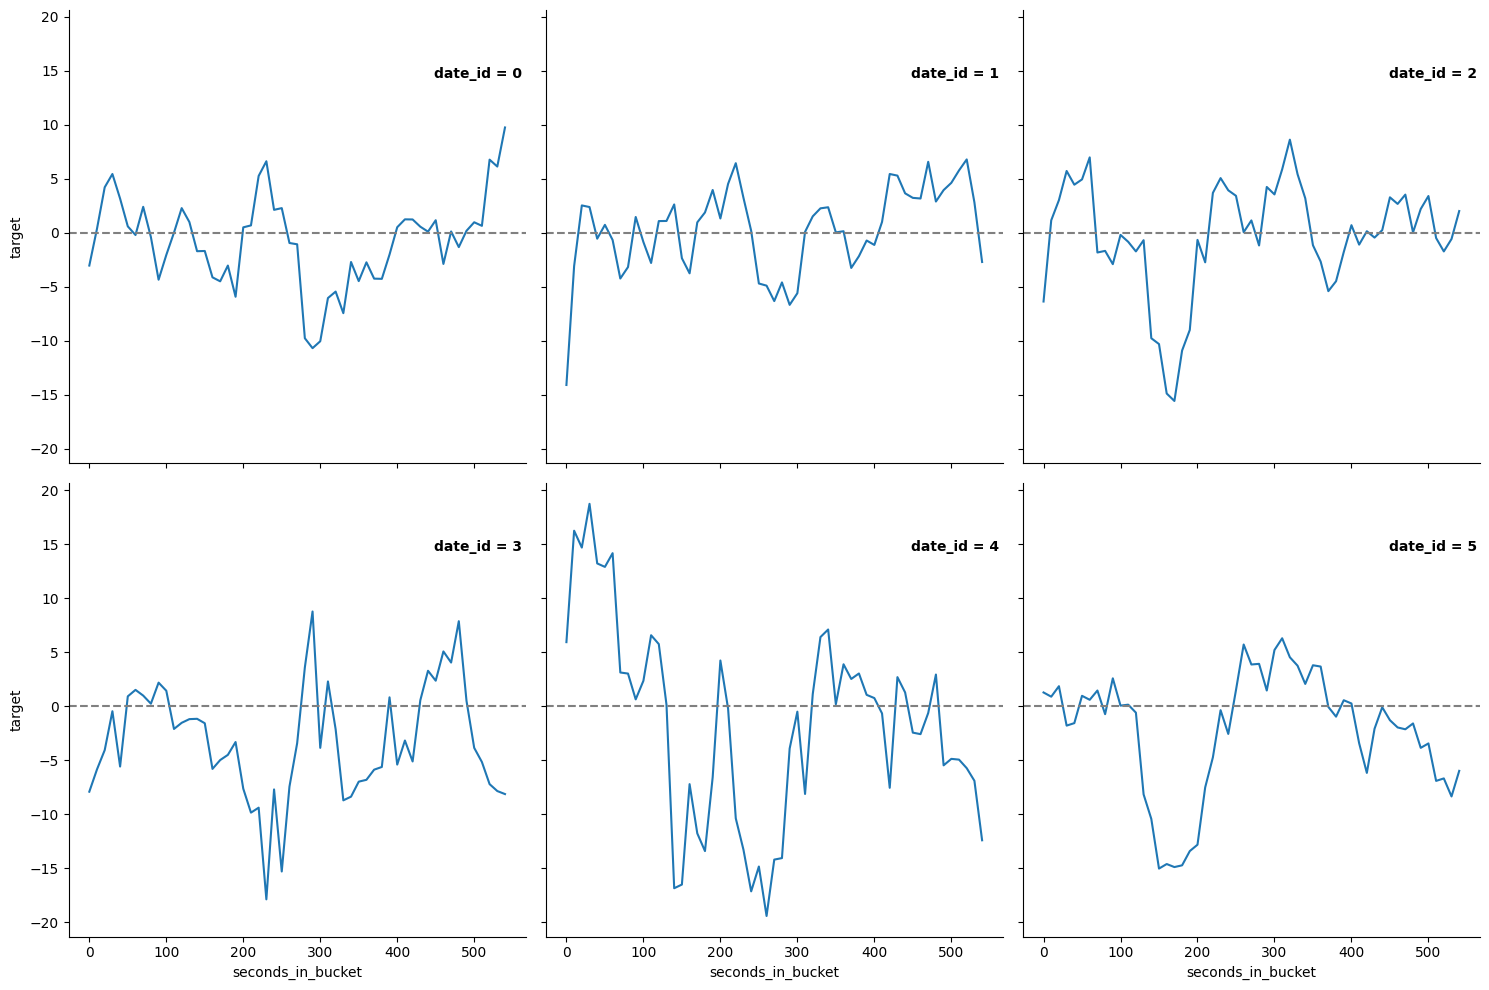

In [17]:

g = sns.relplot(
    data=train_dataset.query("stock_id == 0 & date_id < 6"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26796\3100573449.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['target_sign'][df['target'] >= 0] = 'Positive'
C:\Users\User\AppData\Local\Temp\ipykernel_26796\3100573449.py:4: SettingWithCo

KeyboardInterrupt: 

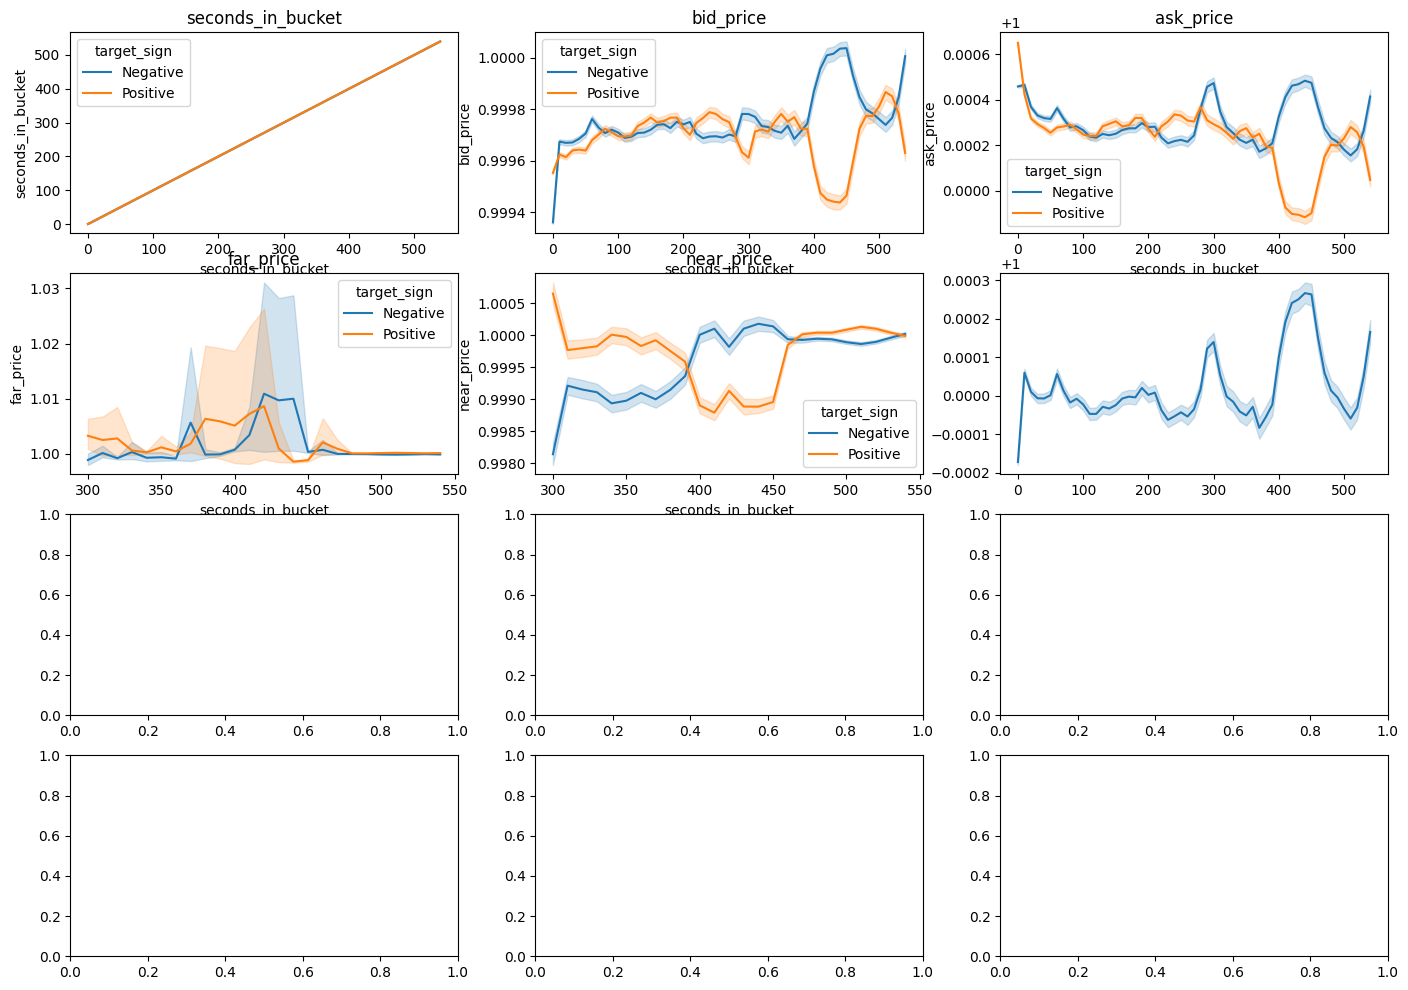

In [56]:
# visualize features by time

df['target_sign'] = 'Negative'
df['target_sign'][df['target'] >= 0] = 'Positive'


cols = ['seconds_in_bucket', 'bid_price', 'ask_price', 'far_price', 'near_price','reference_price', 'wap',
        'ask_size','bid_size','imbalance_size', 'matched_size', 'target']
fig, axes = plt.subplots(4, 3, figsize = (17, 12))
for i, col in enumerate(cols):
    ax = axes[i // 3, i % 3 ]
    data=df.query("stock_id == 0")
    sns.lineplot(data = df, x = 'seconds_in_bucket', y = col, hue = 'target_sign', ax = ax)
    ax.set_title(f"{col}")
plt.tight_layout()
plt.show()

# sns.pairplot(train_dataset[['seconds_in_bucket', 'bid_price', 'ask_price', 'far_price', 'near_price','reference_price', 'wap',
#          'ask_size','bid_size','imbalance_size', 'matched_size', 'target']])
# plt.show()


# Feature Engineering

In [17]:
df_train = train_dataset.copy()

def drop_missing_values(df):
    # drop the missing values of wap
    df = df.dropna(subset=['wap'])
    return df
# drop the missing values of wap
df_train = drop_missing_values(df_train)
df_train.shape





(5237760, 17)

In [20]:


%%time

def calc_feature_single_stock(df):
    # Feature of each stock at different time point
    # date_id
    df["date_id_week"] = df["date_id"] % 5  # Day of the week
    df["date_id_seconds"] = df["seconds_in_bucket"] % 60  # Seconds
    df["date_id_minute"] = df["seconds_in_bucket"] // 60  # Minutes
    
    # ask bid 
    df['spread'] = df['ask_price'] - df['bid_price']
    df['spread_ratio'] = df['ask_price'] / df['bid_price'] - 1
    df['mid_price'] = (df['bid_price'] + df['ask_price'])/2
    
    # Volume represents the total quantity of shares that change hands between buyers and sellers.
    df["total_volume"] = df['ask_size'] + df['bid_size']
    
    # near_price far_price
    df['near_far_ratio'] = df['near_price'] / df['far_price']
    df['near_far_imbalance'] = (df['far_price'] - df['near_price']) / (df['far_price'] + df['near_price'])
    df['near_far_mid'] = (df['near_price'] + df['far_price'])/2
    df['near_far_spread'] = df['far_price'] - df['near_price']
    
    #The ratio between ask/bid and matched sizes provides insights into market liquidity and order flow:
    # A high ask-to-matched ratio suggests that there are more sellers than buyers at a given price level, 
    # potentially indicating resistance to upward price movement.
    # Conversely, a low ratio implies stronger buying interest and potential support for price increases.
    
    df['ask_mat_ratio'] = df['ask_size']/df['matched_size']
    df['bid_mat_ratio'] = df['bid_size']/df['matched_size']
    
    # The ratio between the ask/bid price and the reference price provides insights into market sentiment:
    # - Above 1: If the ask/bid price is higher than the reference price, it suggests bullish sentiment. Sellers are demanding a premium.
    # - Below 1: If the ask/bid price is lower than the reference price, it indicates bearish sentiment. Buyers are getting a discount.
    df['ask_ref_ratio'] = df['ask_price']/df['reference_price']
    df['bid_ref_ratio'] = df['bid_price']/df['reference_price']
    # imbalance_size matched_size
    df['auction_volume'] = df['imbalance_size'] + df['matched_size']

    # cross term 
    df["imbalance_continuous_ratio"] = df['imbalance_size'] / df["total_volume"]
    # the overall level of buying and selling in financial markets
    df['market_activity'] = df['bid_size'] * df['bid_price'] + df['ask_size'] * df['ask_price']
    # The difference between the ask/bid price and the WAP can indicate market efficiency.
    df['ask_wap_diff'] = df['ask_price'] - df['wap']
    df['bid_wap_diff'] = df['wap'] - df['bid_size']
    # Accumulative features
    df['imbalance_buy_sell_flag_cumsum'] =  df.groupby(['stock_id','date_id'])['imbalance_buy_sell_flag'].cumsum()
    
    # statistical features at different time point
    prices = ["reference_price", "far_price", "near_price", "ask_price", "bid_price", "wap"]
    sizes = ["matched_size", "bid_size", "ask_size", "imbalance_size"]
    for func in ["mean", "std", "skew", "kurt"]:
            df[f"all_prices_{func}"] = df[prices].agg(func, axis=1)
            df[f"all_sizes_{func}"] = df[sizes].agg(func, axis=1)
            

    
    df = reduce_mem_usage(df, verbose=0)
    return df

df_train = calc_feature_single_stock(df_train)
df_train.tail()


CPU times: total: 1.11 s
Wall time: 10.1 s


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,bid_wap_diff,all_prices_mean,all_sizes_mean,all_prices_std,all_sizes_std,all_prices_skew,all_sizes_skew,all_prices_kurt,all_sizes_kurt,imbalance_buy_sell_flag_cumsum
5237975,195,480,540,2.440723e+06,-1,1.000000,28280362.0,0.999512,0.999512,1.000000,...,-32256.039062,1.000000,7768301.00,0.000321,13716819.0,-0.881836,1.963867,-1.843750,3.871094,-54
5237976,196,480,540,3.495105e+05,-1,1.000977,9187699.0,1.000000,1.000000,1.000977,...,-205107.406250,1.000977,2458927.75,0.000286,4487072.5,-0.775391,1.997070,-0.152344,3.988281,-55
5237977,197,480,540,0.000000e+00,0,0.995605,12725436.0,0.995605,0.995605,0.995605,...,-16789.664062,0.995605,3230566.25,0.000038,6330434.0,2.412109,1.999023,0.000000,3.996094,-54
5237978,198,480,540,1.000899e+06,1,0.999023,94773272.0,0.999023,0.999023,0.999023,...,-125630.718750,0.999023,24142424.00,0.000115,47088616.0,-1.015625,2.000000,-1.589844,3.998047,28
5237979,199,480,540,1.884286e+06,-1,1.001953,24073678.0,1.000977,1.001953,1.001953,...,-250080.437500,1.001953,6627053.00,0.000598,11655811.0,-1.250000,1.974609,0.696289,3.912109,-35


In [21]:
# make dummy from imbalance_buy_sell_flag and get dummy columns
dummy_cols_list = ['imbalance_buy_sell_flag']
dummy_names = []

for col in dummy_cols_list:
    dummy_df = pd.get_dummies(df_train.loc[:, col], prefix=col, drop_first=True)
    dummy_names += dummy_df.columns.tolist()
    # drop original column
    df_train = df_train.drop(col, axis=1)
    df_train = pd.concat([df_train, dummy_df], axis=1)



### Correlation

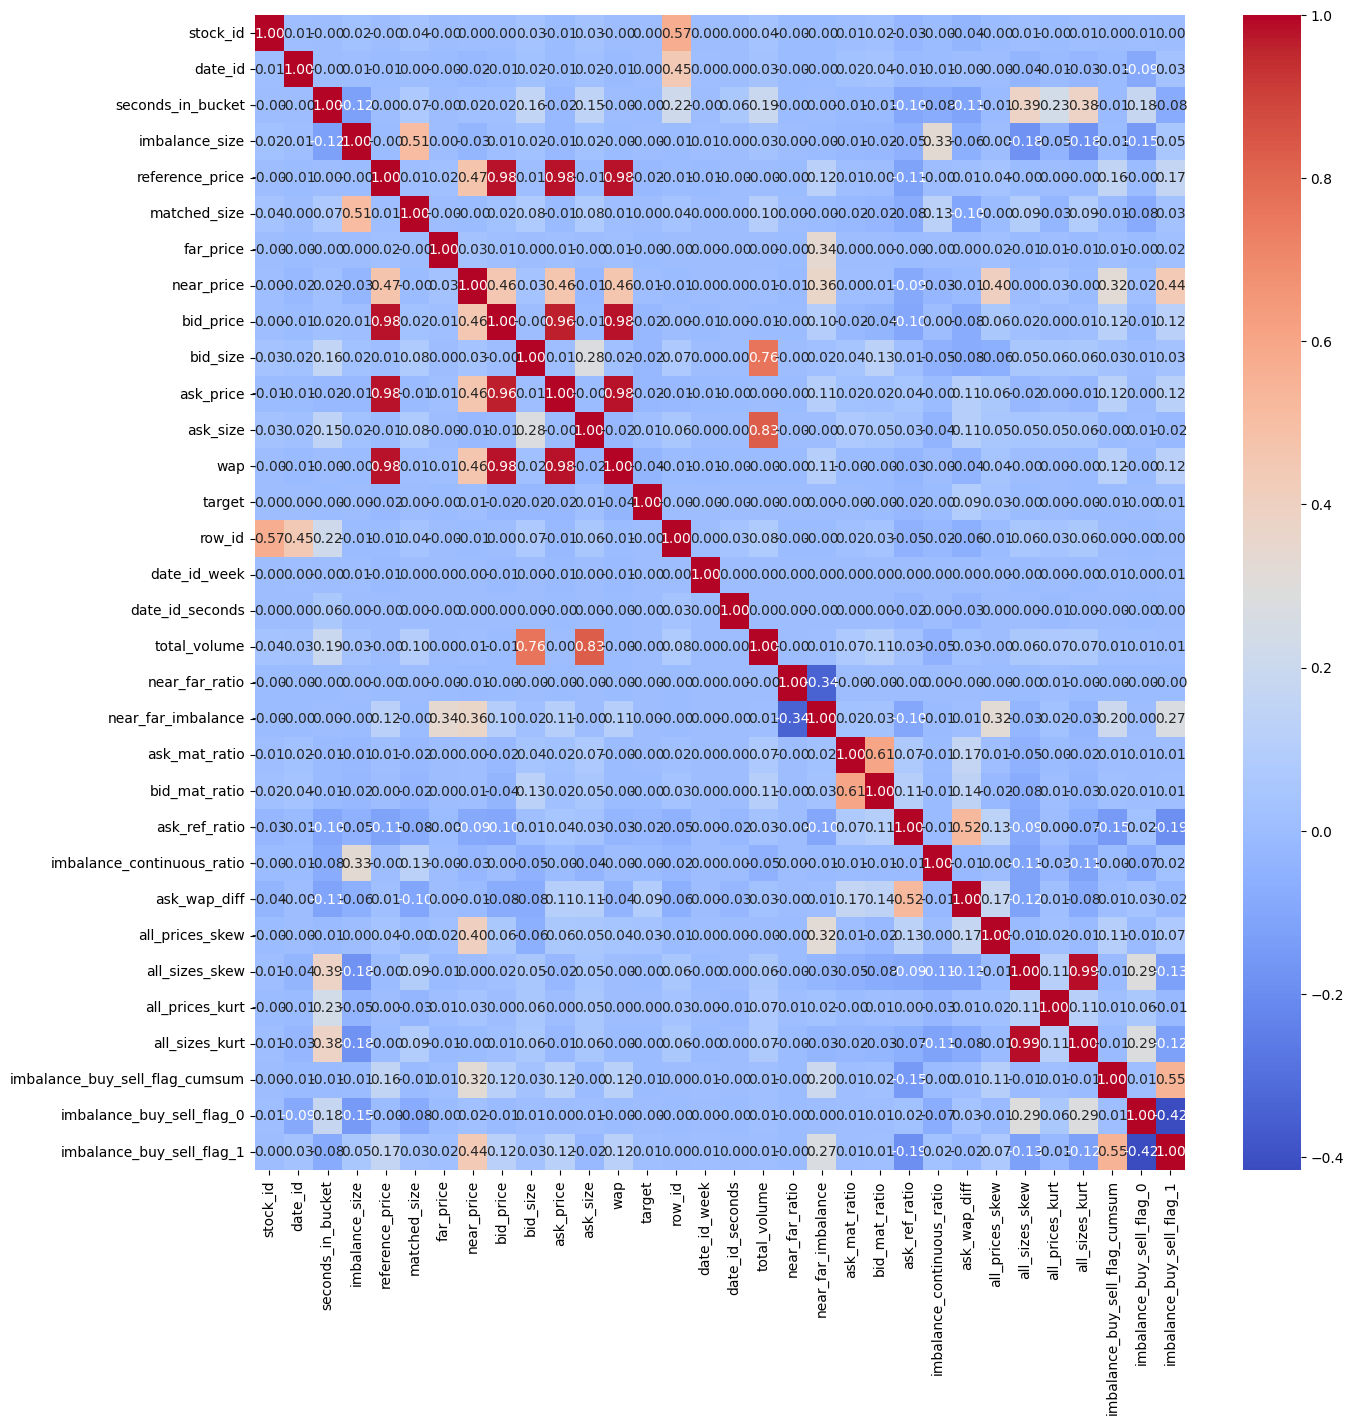

In [60]:
# chack the correlation between the features 
corr = df_train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# drop the columns with high correlation
# Create correlation matrix
#corr_matrix = df_train.corr().abs()
# show the highly correlated features in corr
#corr_matrix = corr_matrix.unstack().sort_values(ascending=False)

### Drop high correlated features

In [59]:


# dropped: near_far_spread, near_far_spread, all_sizes_std,all_prices_std,all_sizes_mean,market_activity,mid_price

# drop these columns
df_train = df_train.drop(['near_far_spread', 'near_far_spread', 'all_sizes_std','all_prices_std','all_sizes_mean','market_activity','mid_price'], axis=1)
# drop: near_far_mid, auction_volume,all_prices_mean,bid_wap_diff
df_train = df_train.drop(['near_far_mid', 'auction_volume','all_prices_mean','bid_wap_diff'], axis=1)
# drop: date_id_minute
df_train = df_train.drop(['date_id_minute'], axis=1)
#drop: bid_ref_ratio, spread_ratio, spread
df_train = df_train.drop(['bid_ref_ratio', 'spread_ratio', 'spread'], axis=1)
# drop: time_id
df_train = df_train.drop(['time_id'], axis=1)

In [61]:
df_train.shape


(5237760, 32)

In [22]:
# save the preprocessed data to csv
#df_train.to_csv('data/optiver-trading-at-the-close/train_preprocessed.csv', index=False)

# Feature Selection

### Load and split the data from csv

In [ ]:
# from sklearn.model_selection import train_test_split

# df = pd.read_csv('data/optiver-trading-at-the-close/train_preprocessed.csv')
# train_df = df.drop(columns=['target'])
# targets = df['target']

# X_train, X_test, y_train, y_test = train_test_split(train_df, targets, test_size=0.2, shuffle=False)

### Split the data

In [63]:
from sklearn.model_selection import train_test_split
train_df = df_train.drop(columns=['target'])
targets = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(train_df, targets, test_size=0.2, shuffle=False)

#### Use RFECV and XGBoost to recursively select features

In [66]:
%%time
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit

seed = 42 # Set the seed

# Initialize the XGBRegressor with desired hyperparameters
bst_xgb = XGBRegressor(
    booster = 'gbtree',
    objective='reg:absoluteerror',
    eval_metric = 'mae',
    n_estimators = 50,
    learning_rate = 0.3,
    random_state=seed,
    verbosity=0,
    device='cuda'
)

tscv = TimeSeriesSplit(n_splits=5)
selector = RFECV(bst_xgb, min_features_to_select=1, step=5, cv=tscv, verbose=3)
selector = selector.fit(X_train, y_train)

Fitting estimator with 31 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 26 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 21 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 16 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 11 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 6 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 31 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 26 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 21 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 16 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 11 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 6 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 31 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 26 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 21 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 16 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 11 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 6 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 31 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


Fitting estimator with 26 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


Fitting estimator with 21 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


Fitting estimator with 16 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


Fitting estimator with 11 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


Fitting estimator with 6 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


Fitting estimator with 31 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 26 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 21 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 16 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 11 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 6 features.


c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
c:\Users\User\Alkalmazások\python\lib\site-packages\numpy\lib\function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
c:\Users\User\Alkalmazások\python\lib\site-packages\sklearn\metrics\_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


Fitting estimator with 31 features.
Fitting estimator with 26 features.
CPU times: total: 15min 43s
Wall time: 4min 41s


In [67]:
# Number of selected features
print(selector.n_features_)

# Feature names
print(selector.feature_names_in_)



21
['stock_id' 'date_id' 'seconds_in_bucket' 'imbalance_size'
 'reference_price' 'matched_size' 'far_price' 'near_price' 'bid_price'
 'bid_size' 'ask_price' 'ask_size' 'wap' 'row_id' 'date_id_week'
 'date_id_seconds' 'total_volume' 'near_far_ratio' 'near_far_imbalance'
 'ask_mat_ratio' 'bid_mat_ratio' 'ask_ref_ratio'
 'imbalance_continuous_ratio' 'ask_wap_diff' 'all_prices_skew'
 'all_sizes_skew' 'all_prices_kurt' 'all_sizes_kurt'
 'imbalance_buy_sell_flag_cumsum' 'imbalance_buy_sell_flag_0'
 'imbalance_buy_sell_flag_1']


IndexError: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 31

In [71]:
selected_features = ['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size'
 ,'reference_price', 'matched_size' ,'far_price', 'near_price' ,'bid_price',
 'bid_size', 'ask_price' ,'ask_size' ,'wap' ,'row_id', 'date_id_week',
 'date_id_seconds', 'total_volume' ,'near_far_ratio', 'near_far_imbalance',
 'ask_mat_ratio' ,'bid_mat_ratio', 'ask_ref_ratio',
 'imbalance_continuous_ratio' ,'ask_wap_diff', 'all_prices_skew',
 'all_sizes_skew' ,'all_prices_kurt', 'all_sizes_kurt',
 'imbalance_buy_sell_flag_cumsum', 'imbalance_buy_sell_flag_0',
 'imbalance_buy_sell_flag_1','target']

# keep only the selected features
df_train = df_train[selected_features]

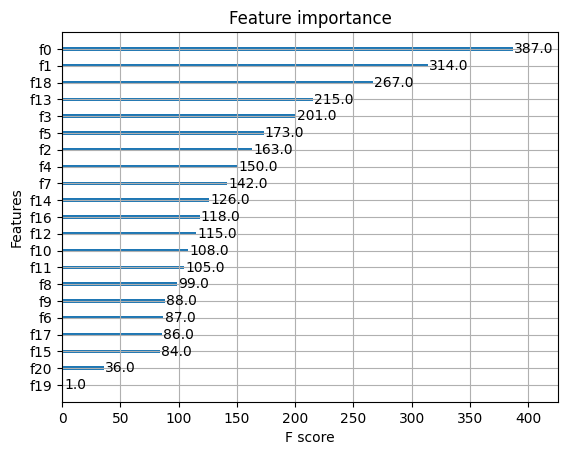

In [69]:


# Plot the feature importance
from xgboost import plot_importance
from matplotlib import pyplot

# plot selectors feature importance 
plot_importance(selector.estimator_)

pyplot.show()

In [72]:
# save the preprocessed data to csv
#df_train.to_csv('data/optiver-trading-at-the-close/train_preprocessed.csv', index=False)

In [73]:
#df = pd.read_csv('data/optiver-trading-at-the-close/train_preprocessed.csv')